In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
# x'(t) = cos(5t)
dt = 0.01

def x_prime(prev_val, coeffs):
    return torch.cos(coeffs["w"]*prev_val["t"])

def t_prime(prev_val, coeffs):
    return 1

ode = {"x": x_prime, "t": t_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"w": 5.}


# Dataset: x(t) = 0.2 sin(5t)

In [21]:
result = torch.cat((0.2*torch.sin(5*torch.arange(0,10,dt).view(1000,1)), torch.arange(0,10,dt).t().view(1000,1)), dim=1)

In [22]:
result

tensor([[ 0.0000,  0.0000],
        [ 0.0100,  0.0100],
        [ 0.0200,  0.0200],
        ...,
        [-0.0807,  9.9700],
        [-0.0715,  9.9800],
        [-0.0621,  9.9900]])

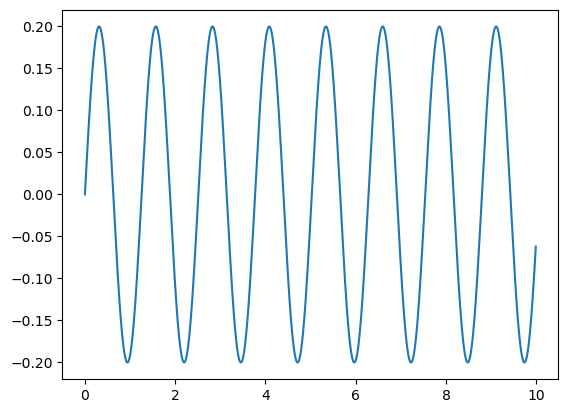

In [23]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,1], result_np[:,0])

plt.show()

# Euler's method for training

In [24]:
ode_train_coeffs = {"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

In [25]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(0.0001, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.0746, requires_grad=True)}
Epoch: 1	 Loss: tensor(1.6998e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.7705, requires_grad=True)}
Epoch: 2	 Loss: tensor(4.8719e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(3.9035, requires_grad=True)}
Epoch: 3	 Loss: tensor(6.1404e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(5.8478, requires_grad=True)}
Epoch: 4	 Loss: tensor(1.2617e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(5.0906, requires_grad=True)}
Epoch: 5	 Loss: tensor(1.4774e-06, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.8040, requires_grad=True)}
Epoch: 6	 Loss: tensor(6.7173e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.9461, requires_grad=True)}
Epoch: 7	 Loss: tensor(2.2041e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.6637, requires_grad=Tru

In [26]:
ode_solver_train.coeffs

{'w': Parameter containing:
 tensor(5.0055, requires_grad=True)}

# Predictions for nt=1000

In [27]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000,  0.0000],
        [ 0.0100,  0.0100],
        [ 0.0200,  0.0200],
        ...,
        [-0.0700,  9.9701],
        [-0.0607,  9.9801],
        [-0.0512,  9.9901]], grad_fn=<StackBackward>)

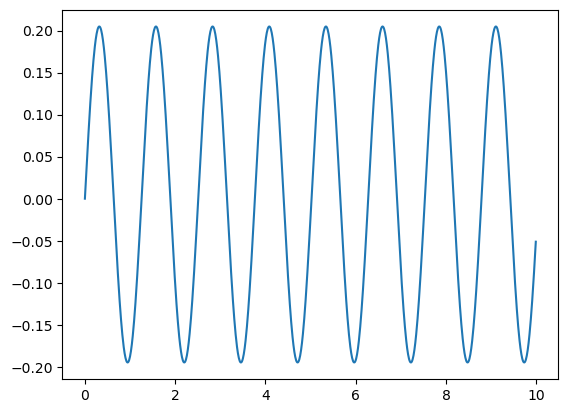

In [28]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()

# Runge-Kutta for training

In [29]:
ode_train_coeffs = {"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

In [30]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(6.4903e-06, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.2780, requires_grad=True)}
Epoch: 1	 Loss: tensor(3.5491e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.2486, requires_grad=True)}
Epoch: 2	 Loss: tensor(2.1207e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.6527, requires_grad=True)}
Epoch: 3	 Loss: tensor(2.7050e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.6368, requires_grad=True)}
Epoch: 4	 Loss: tensor(2.4687e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.5153, requires_grad=True)}
Epoch: 5	 Loss: tensor(9.7100e-06, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.5416, requires_grad=True)}
Epoch: 6	 Loss: tensor(1.7244e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(5.0945, requires_grad=True)}
Epoch: 7	 Loss: tensor(0.0001, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(4.7973, requires_grad=Tru

In [31]:
ode_solver_train.coeffs

{'w': Parameter containing:
 tensor(5.0000, requires_grad=True)}

# Predictions for nt = 1000

In [32]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000,  0.0000],
        [ 0.0100,  0.0100],
        [ 0.0200,  0.0200],
        ...,
        [-0.0806,  9.9701],
        [-0.0714,  9.9801],
        [-0.0619,  9.9901]], grad_fn=<StackBackward>)

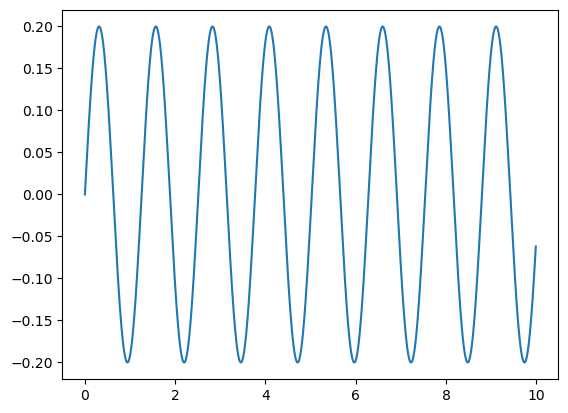

In [33]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()